# Proyecto 3: Predicción de precios de propiedades

¡Bienvenidos al tercer proyecto de la carrera de Data Science de Acamica! 

En este proyecto vamos a seguir trabajando con el dataset de propiedades en venta publicadas en el portal [Properati](www.properati.com.ar). El objetivo en este caso armar nuestros primeros modelos para predecir el precio de las propiedades en dólares.

Las columnas que se agregan son:

* `barrios_match`: si coincide el barrio publicado con el geográfico vale 1, si no 0.

* `PH`, `apartment`, `house`: variables binarias que indican el tipo de propiedad.

* dummies de barrios: variables binarias con 1 o 0 según el barrio.

La métrica que vamos a usar para medir es RMSE (raíz del error cuadrático medio), cuya fórmula es:

$$RMSE = \sqrt{\frac{\sum_{t=1}^n (\hat y_t - y_t)^2}{n}}$$

In [1]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)
path_dataset = 'dataset/datos_properati_limpios_model.csv'
df = pd.read_csv(path_dataset)

In [2]:
print("El dataset que vamos a trabajar aquí tiene {} observaciones".format(df.shape[0]))

El dataset que vamos a trabajar aquí tiene 6376 observaciones


In [3]:
df.sample(6)

,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,rooms,barrio_match,PH,apartment,house,...,VILLA LUGANO,VILLA LURO,VILLA ORTUZAR,VILLA PUEYRREDON,VILLA REAL,VILLA RIACHUELO,VILLA SANTA RITA,VILLA SOLDATI,VILLA URQUIZA,outlier_price_m2
764,-34.555,-58.482,169000.000,52.000,48.000,3,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1955,-34.593,-58.395,129000.000,36.000,32.000,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2654,-34.615,-58.405,73900.000,32.000,32.000,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2400,-34.602,-58.390,159000.000,76.000,76.000,4,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5868,-34.623,-58.404,155000.000,60.000,57.000,3,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3584,-34.636,-58.461,138000.000,65.000,65.000,3,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


El objetivo de este proyecto es poder trabajar en el ajuste de modelos y su posterior evaluación.

Para empezar vamos a separar el `dataset` en un conjunto de entrenamiento (80%) y un conjunto de test (20%). 

**Separá el dataset** en `X_train`, `X_test`, `y_train` e `y_test` con el tamaño correspondiente

In [4]:
X = df.drop(['price_aprox_usd'], axis=1)
y = df['price_aprox_usd']

# Realizá la separación a continuación en esta celda

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2, random_state=101)

In [6]:
#veo como si hice bien
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5100, 58)
(5100,)
(1276, 58)
(1276,)


## Árboles de decisión

Lo primero que vamos a hacer es entrenar un árbol de decisión y usar de métrica al `RMSE`. 

Para poder obtener el **RMSE** vamos a medir el `mean_squared_error` y obtener su raíz cuadrada. 

**Importá** `DecisionTreeRegressor` desde `sklearn.tree`.  

A continuación **entrená** el regresor con el conjunto de training


In [7]:
# En esta celda cargá el regresor y realizá el entrenamiento
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

Con el modelo entrenado **realizá la predicción** sobre el conjunto de test `X_test` y guardá el resultado en una variable `y_pred`.

In [8]:
# Acá realizá la predicción
y_pred = dtr.predict(X_test)

**Calculá el rmse** sacando la raíz cuadrada de `mean_squared_error` entre `y_test` e `y_pred` y **mostrá** el resultado

In [9]:
# En esta celda calculá el rmse
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: {}".format(rmse))

RMSE: 25019.240480800046


__Analizar el cambio en el RMSE a medida que es más profundo el árbol de decisión, tanto en training como en testing.__

Para esto, **iterá** de 5 en 5 en el parámetro `max_depth` y **observá** como impacta en el RMSE. 

**Creá** dos arreglos `rmses_train` y `rmses_test` para ir guardando los **rmse** de cada profundidad

Ahora graficamos los valores que guardamos en los arreglos `rmses_train` y `rmses_test`

In [10]:
rmses_train = []
rmses_test = []
for i in range(1,30,5):
    dtr = DecisionTreeRegressor(max_depth=i)
    dtr.fit(X_train, y_train)
    rmses_train.append(sqrt(mean_squared_error(y_train, dtr.predict(X_train))))
    rmses_test.append(sqrt(mean_squared_error(y_test, dtr.predict(X_test))))

In [11]:
#verificamos
print(rmses_train)
print(rmses_test)

[26765.749546633495, 20287.653080796998, 14502.416651812693, 8083.001045000178, 3377.4281189908756, 1087.9175590096402]
[26491.81912726466, 21635.078168246277, 22066.41779910552, 24056.41289253973, 24738.17826130295, 24860.953561137227]


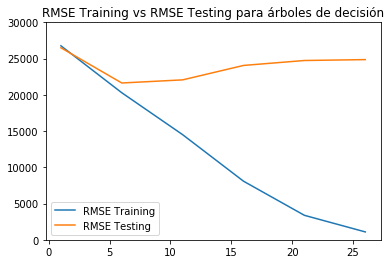

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.plot(range(1,30, 5), rmses_train, label='RMSE Training')
plt.plot(range(1,30, 5), rmses_test, label='RMSE Testing')
plt.ylim((0, 30000))
plt.legend(loc="best")
plt.title("RMSE Training vs RMSE Testing para árboles de decisión")
plt.show()

Podemos ver aquí como el modelo presenta sobreajuste dado que a mayor complejidad (en este caso, mayor profundidad del árbol) más diferencia entre los resultados de training y testing. También observamos como la curva de testing decrece y luego vuelvo a crecer. El punto donde se minimiza está relacionado con el tradeoff entre sesgo y varianza que vamos a ver en la próxima unidad.

## KNN

**Entrená un knn** y nuevamente medir el **rmse** en el conjunto de testing


In [13]:
# Realizá el entrenamiento y el cálculo de rmse en esta celda
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(X_train, y_train) 
y_pred = knn.predict(X_test)
rmse = sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: {}".format(rmse))

RMSE: 22955.833245633177


__Analizar el cambio en el RMSE a medida que consideramos más vecinos para KNN, tanto en training como en testing.__

Para esto, **iterá** incrementando de a uno el parámetro `n_neighbors` y **observá** como impacta en el RMSE. 

**Creá** dos arreglos `rmses_train` y `rmses_test` para ir guardando los **rmse** de cada profundidad

In [14]:
# Calculá los cambio en el rmse en esta celda
rmses_train = []
rmses_test = []
for i in range(1,30,1):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    rmses_train.append(sqrt(mean_squared_error(y_train, knn.predict(X_train))))
    rmses_test.append(sqrt(mean_squared_error(y_test, knn.predict(X_test))))

In [15]:
#verificamos
print(len(rmses_train))
print(len(rmses_test))

29
29


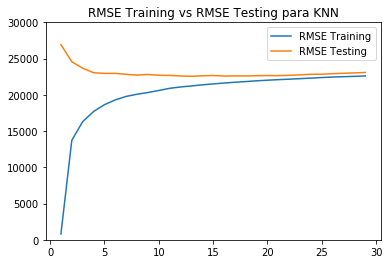

In [16]:
plt.plot(range(1,30, 1), rmses_train, label='RMSE Training')
plt.plot(range(1,30, 1), rmses_test, label='RMSE Testing')
plt.ylim((0, 30000))
plt.legend(loc="best")
plt.title("RMSE Training vs RMSE Testing para KNN")
plt.show()

**Calcular el RMSE promedio del resultado de cross validation para un árbol de decisión. 
Como parámetros deberás usar:**
- 10 folds
- profundidad 5
- scoring neg_mean_squared_error.

El árbol de decisión guardalo en una variable llamada `regressor` para poder reutilizarla luego.

Atención: `cross_validation_score` de `scikit-learn` usá la métrica `neg_mean_squared_error` (NMSE) en vez de `mean_square_error` (MSE). 

`NMSE` es lo mismo que `MSE` pero con un signo negativo. 

Como nosotros queremos obtener el `MSE` para calcular sobre él el `RMSE`, vamos a definir un método `nmsq2rmse` para hacer esa conversión de `NMSE` a `MSE`
.

In [17]:
def nmsq2rmse(score):
    return np.sqrt(-score)

In [18]:
import numpy as np
from sklearn.model_selection import cross_val_score
regressor = DecisionTreeRegressor(max_depth=5)
neg_scores = cross_val_score(regressor, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
rmse_scores = nmsq2rmse(neg_scores)

def mostrar(x):
    i = 1
    for x in x:
        print("Score {0}: {1}" .format(i,x))
        i +=1

mostrar(rmse_scores)

Score 1: 21312.87154732693
Score 2: 21571.175113206893
Score 3: 22611.73431983074
Score 4: 22174.15938954698
Score 5: 21715.670702337797
Score 6: 21799.57087681522
Score 7: 20805.600899346435
Score 8: 21129.921025325726
Score 9: 23795.464220229434
Score 10: 22311.966365471282


Para ver el resultado final, reentrenamos al regresor y mostramos en un dataframe la comparación entre los valores reales, los predichos y su diferencia

In [19]:
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
val_real = pd.Series(y_test.values)
val_pred = pd.Series(y_pred)

In [20]:
predicciones = pd.concat([val_real.rename('Valor real'),val_pred.rename('Valor Pred') ,abs(val_real-val_pred).rename('Dif(+/-)')] ,  axis=1)

In [21]:
predicciones.head(10)

,Valor real,Valor Pred,Dif(+/-)
0,100000.000,118021.453,18021.453
1,99999.000,107416.816,7417.816
2,133000.000,106557.945,26442.055
3,111000.000,106557.945,4442.055
4,175000.000,136364.128,38635.872
5,145000.000,149350.988,4350.988
6,145000.000,133592.251,11407.749
7,87000.000,120733.549,33733.549
8,125000.000,136364.128,11364.128
9,150000.000,149350.988,649.012
